In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('Housepriceprediction_train.csv')
df= df.set_index('Id')
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
corr= df.corr(numeric_only= True)['SalePrice'].sort_values(ascending= False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [8]:
important_features= corr[corr>0.2].index
important_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF'],
      dtype='object')

In [9]:
important_cols= ['OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'SalePrice']

new_df= df[important_cols].copy()
new_df.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,SalePrice
Id,,,,,,,,,,,,,,
1,7,1710,2,856,856,2,8,2003,2003,196.0,0,706,65.0,208500
2,6,1262,2,1262,1262,2,6,1976,1976,0.0,1,978,80.0,181500
3,7,1786,2,920,920,2,6,2001,2002,162.0,1,486,68.0,223500
4,7,1717,3,756,961,1,7,1915,1970,0.0,1,216,60.0,140000
5,8,2198,3,1145,1145,2,9,2000,2000,350.0,1,655,84.0,250000
6,5,1362,2,796,796,1,5,1993,1995,0.0,0,732,85.0,143000
7,8,1694,2,1686,1694,2,7,2004,2005,186.0,1,1369,75.0,307000
8,7,2090,2,1107,1107,2,7,1973,1973,240.0,2,859,NaN,200000
9,7,1774,2,952,1022,2,8,1931,1950,0.0,2,0,51.0,129900


In [10]:
new_df.shape

(1460, 14)

In [11]:
new_df.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
SalePrice         0
dtype: int64

In [12]:
new_df['LotFrontage']= new_df['LotFrontage'].fillna(new_df['LotFrontage'].mean())

In [13]:
new_df['MasVnrArea']= new_df['MasVnrArea'].fillna(new_df['MasVnrArea'].mean())

In [14]:
new_df.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
SalePrice       0
dtype: int64

In [15]:
X= new_df.drop('SalePrice', axis=1)
y= new_df['SalePrice']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 12)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 13), (292, 13), (1168,), (292,))

In [38]:
from sklearn.linear_model import LinearRegression
Lr_full= LinearRegression()
Lr_full.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
y_pred_full= Lr_full.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(y_test, y_pred_full)
mse= mean_squared_error(y_test, y_pred_full)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred_full)

In [22]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)

Mean Absolute Error: 22040.065971395376
Mean Squared Error: 1383920761.3140364
Root Mean Squared Error: 37201.08548569566
R-squared Score: 0.7791709083849221


In [23]:
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']
X1 = new_df[features]
y1 = new_df['SalePrice']

In [47]:
X1_train_lr, X1_test_lr, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)

In [48]:
lr_small= LinearRegression()
lr_small.fit(X1_train_lr, y1_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
y_pred_lr= lr_small.predict(X1_test_lr)

In [36]:
#Using Polynomial Regression Features
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree= 2)
## Degree kept at 2 to avoid overfitting and feature explosion

In [42]:
X1_train_pr, X1_test_pr, y1_train, y1_test= train_test_split(X1, y1, test_size= 0.2, random_state= 12)

In [43]:
X1_train_poly= poly.fit_transform(X1_train_pr)
X1_test_poly= poly.transform(X1_test_pr)

In [46]:
poly_model= LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
poly_model= LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

In [28]:
y1_pred_poly= poly_model.predict(X1_test_poly)

In [50]:
print("L2 Score with Linear Features:", r2_score(y_test, y_pred_lr))
print("L2 Score with Polynomial Features:", r2_score(y1_test, y1_pred_poly))

L2 Score with Linear Features: 0.7224992741196373
L2 Score with Polynomial Features: 0.7062503217796072


In [58]:
print("Conclusion of comparison:")
print("-> Polynomial regression did not improve performance; linear regression generalizes better for this dataset.")

Conclusion of comparison:
-> Polynomial regression did not improve performance; linear regression generalizes better for this dataset.


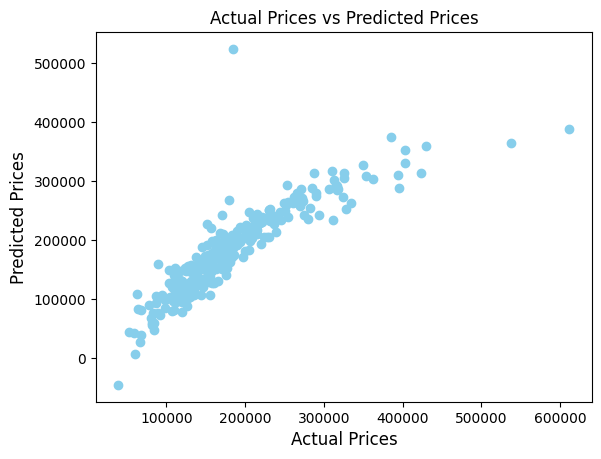

In [51]:
plt.scatter(y_test, y_pred_full, color= 'skyblue')
plt.xlabel('Actual Prices', fontsize= 12)
plt.ylabel('Predicted Prices', fontsize= 12)
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [52]:
#Residual Plot for Linear Regression
residuals= y_test - y_pred_lr

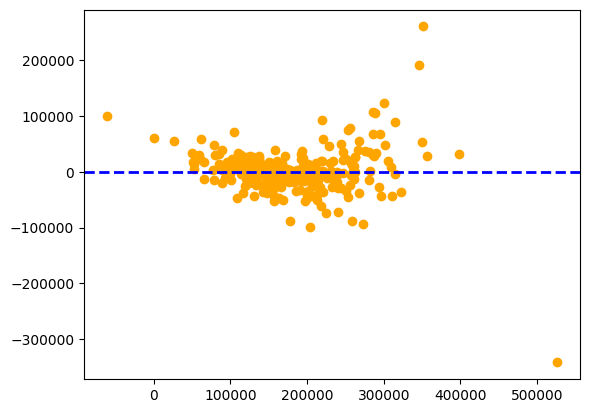

In [54]:
plt.scatter(y_pred_lr, residuals, color= 'orange')
plt.axhline(y=0, color= 'blue', linestyle= '--', linewidth= 2)
plt.show()

In [33]:
#Residual Plot for Polynomial Regression
residuals_= y1_test - y1_pred_poly

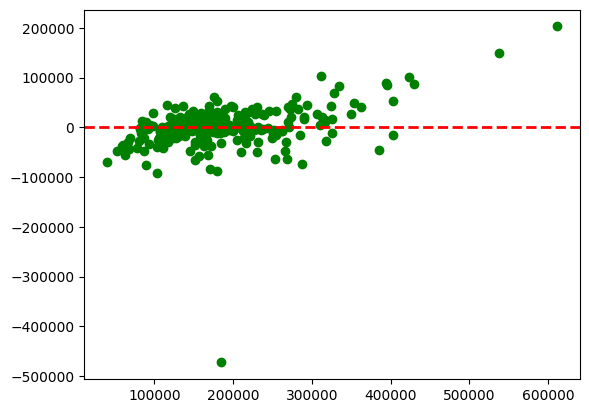

In [34]:
plt.scatter(y1_test, residuals_, color= 'green')
plt.axhline(y=0, color= 'red', linestyle= '--', linewidth= 2)
plt.show()

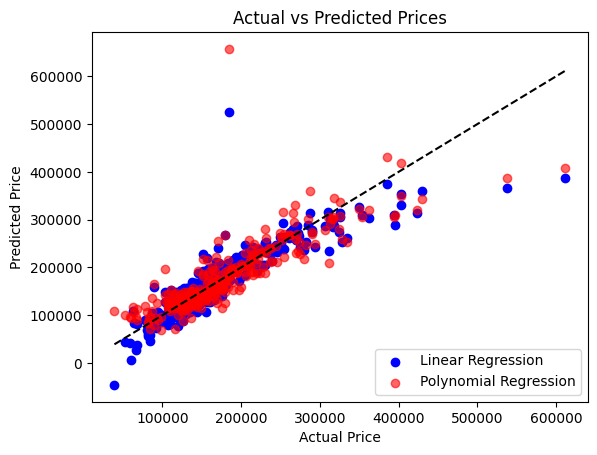

In [61]:
plt.scatter(y_test, y_pred_full, color='blue', label='Linear Regression')
plt.scatter(y_test, y1_pred_poly, color='red', alpha=0.6, label='Polynomial Regression')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()


In [35]:
print("CONCLUSION:")
print("- The dataset was successfully cleaned and prepared for modeling.")
print("- Linear Regression was trained using multiple features to predict house prices.")
print("- Polynomial Regression (degree = 2) was applied on selected numerical features to capture non-linear relationships.")
print("- Model performance was evaluated using MAE, RMSE, and R² score.")
print("- Linear Regression showed stable performance and good generalization.")
print("- Polynomial Regression did not significantly improve performance and showed signs of overfitting.")
print("- Residual analysis confirmed that Linear Regression errors were more randomly distributed.")
print("- Hence, Linear Regression was selected as the preferred model for this dataset.")

CONCLUSION:
- The dataset was successfully cleaned and prepared for modeling.
- Linear Regression was trained using multiple features to predict house prices.
- Polynomial Regression (degree = 2) was applied on selected numerical features to capture non-linear relationships.
- Model performance was evaluated using MAE, RMSE, and R² score.
- Linear Regression showed stable performance and good generalization.
- Polynomial Regression did not significantly improve performance and showed signs of overfitting.
- Residual analysis confirmed that Linear Regression errors were more randomly distributed.
- Hence, Linear Regression was selected as the preferred model for this dataset.
